In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [44]:
asap_df = pd.read_excel("dataset/asap.xlsx")
asap_df = asap_df.drop(columns=['id', 'dataset', 'question_id', 'question', 'correct'])
asap_df.head()

,real_answer,answer,score,score2
0,You would need many more pieces of information...,Some additional information that we would need...,1,1
1,You would need many more pieces of information...,"After reading the expirement, I realized that ...",1,1
2,You would need many more pieces of information...,"What you need is more trials, a control set up...",1,1
3,You would need many more pieces of information...,The student should list what rock is better an...,0,0
4,You would need many more pieces of information...,For the students to be able to make a replicat...,2,2


In [45]:
asap_df['avg_score'] = asap_df[['score', 'score2']].mean(axis=1).round(0)
asap_df['prompt'] = (
    "Reference Answer: " + asap_df['real_answer'] + "\n"
    "Student Answer: " + asap_df['answer'] + "\n"
    "Grading Rubric: 0-3 (where 0 is the lowest score and 3 is the highest).\n"
    "Scores given by experts: " + str(asap_df['avg_score'])
)
asap_df['prompt_length'] = asap_df['prompt'].apply(len)
asap_df.head()

,real_answer,answer,score,score2,avg_score,prompt,prompt_length
0,You would need many more pieces of information...,Some additional information that we would need...,1,1,1.0,Reference Answer: You would need many more pie...,995
1,You would need many more pieces of information...,"After reading the expirement, I realized that ...",1,1,1.0,Reference Answer: You would need many more pie...,977
2,You would need many more pieces of information...,"What you need is more trials, a control set up...",1,1,1.0,Reference Answer: You would need many more pie...,850
3,You would need many more pieces of information...,The student should list what rock is better an...,0,0,0.0,Reference Answer: You would need many more pie...,769
4,You would need many more pieces of information...,For the students to be able to make a replicat...,2,2,2.0,Reference Answer: You would need many more pie...,839


In [46]:
asap_df['prompt_length'].describe()

count    17043.000000
mean       868.411489
std        171.846656
min        485.000000
25%        749.000000
50%        854.000000
75%        966.000000
max       2399.000000
Name: prompt_length, dtype: float64

In [47]:
asap_df.shape

(17043, 7)

## Score distribution plot

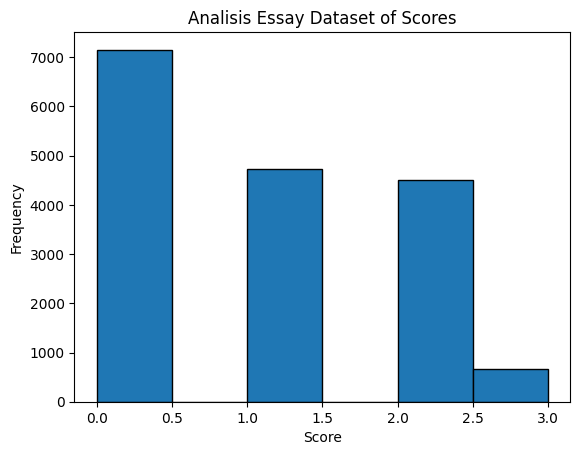

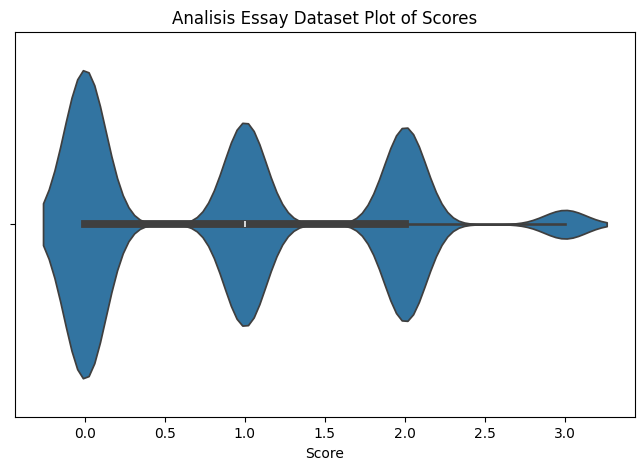

In [48]:
plt.hist(asap_df['avg_score'], bins=6, edgecolor='black')
plt.title('Analisis Essay Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=asap_df['avg_score'])
plt.title('Analisis Essay Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()

## Input Length Plot

In [49]:
asap_df['r_length'] = asap_df['real_answer'].apply(len)
asap_df['a_length'] = asap_df['answer'].apply(len)

In [50]:
print("\ndeskripsi reference answer")
print(asap_df['r_length'].describe())
print("\ndeskripsi student answer")
print(asap_df['a_length'].describe())


deskripsi reference answer
count    17043.000000
mean       310.456962
std         84.266824
min        153.000000
25%        258.000000
50%        323.000000
75%        359.000000
max        451.000000
Name: r_length, dtype: float64

deskripsi student answer
count    17043.000000
mean       235.954527
std        150.977519
min          1.000000
25%        127.000000
50%        217.000000
75%        318.000000
max       1819.000000
Name: a_length, dtype: float64


### Reference answer plot

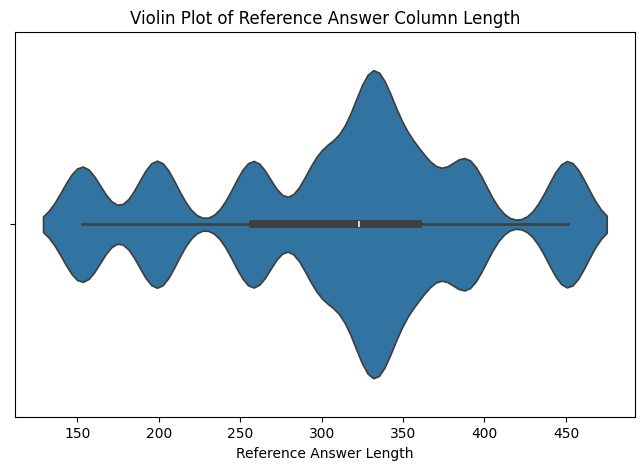

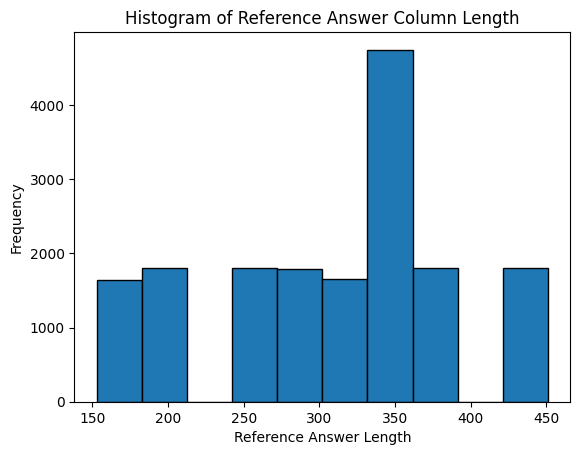

In [51]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=asap_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(asap_df['r_length'], bins=10, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

## Student answer plot

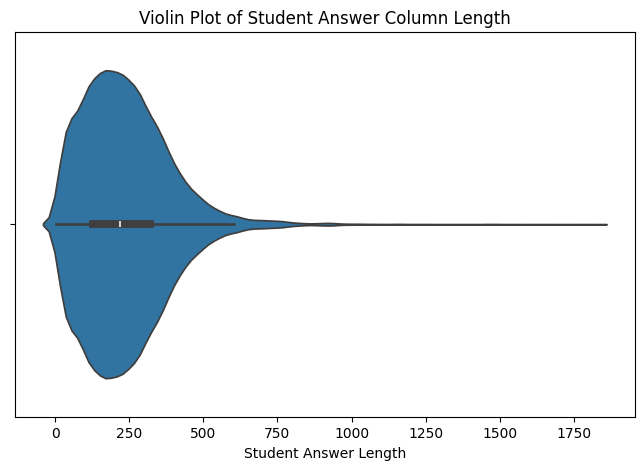

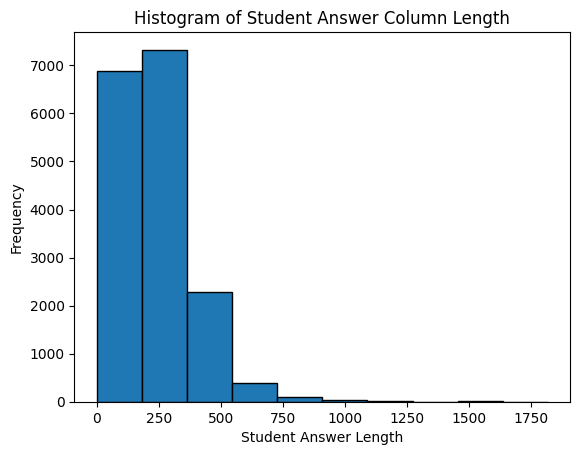

In [52]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=asap_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(asap_df['a_length'], bins=10, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()

In [53]:
asap_df.head()

,real_answer,answer,score,score2,avg_score,prompt,prompt_length,r_length,a_length
0,You would need many more pieces of information...,Some additional information that we would need...,1,1,1.0,Reference Answer: You would need many more pie...,995,359,314
1,You would need many more pieces of information...,"After reading the expirement, I realized that ...",1,1,1.0,Reference Answer: You would need many more pie...,977,359,296
2,You would need many more pieces of information...,"What you need is more trials, a control set up...",1,1,1.0,Reference Answer: You would need many more pie...,850,359,169
3,You would need many more pieces of information...,The student should list what rock is better an...,0,0,0.0,Reference Answer: You would need many more pie...,769,359,88
4,You would need many more pieces of information...,For the students to be able to make a replicat...,2,2,2.0,Reference Answer: You would need many more pie...,839,359,158


In [54]:
asap_df = asap_df.drop(columns=['score', 'score2', 'prompt', 'prompt_length', 'r_length', 'a_length'])

In [55]:
asap_df = asap_df.rename(columns={'avg_score':'score', 'real_answer':'reference_answer'})
asap_df.head()

,reference_answer,answer,score
0,You would need many more pieces of information...,Some additional information that we would need...,1.0
1,You would need many more pieces of information...,"After reading the expirement, I realized that ...",1.0
2,You would need many more pieces of information...,"What you need is more trials, a control set up...",1.0
3,You would need many more pieces of information...,The student should list what rock is better an...,0.0
4,You would need many more pieces of information...,For the students to be able to make a replicat...,2.0


In [56]:
asap_df.to_csv('dataset/asap.csv', index=False)